# <font color='blue'>1 - British Airways Data Analysis</font>
# <font color='blue'>2 - Scrapping the Data</font>
# <font color='blue'>3 - Processing the Data</font>
# <font color='blue'>4 - Analyzing the Data</font>
# <font color='blue'>5 - Conclusion</font>


![title](images/aircraft.jpg)

# 1 - British Airways Data Analysis

### Português:
* Esta é a resolução de um caso para uma simulação de emprego da British Airways. O objetivo é obter os dados sobre as avaliações de voos realizados pela empresa durante anos.
* Primeiramente, vamos obter os dados atraves de um scraping realizado no site sugerido pelo case.
* Após isso, vamos tratar os dados.
* E por último, vamos fazer uma análise dos dados obtidos, em busca de insights que possam ajudar a empresa.
* Todo o jupyter notebook estará em inglês.

### English:
* This is the resolution of a case for a British Airways job simulation. The objective is to obtain data on evaluations of flights carried out by the company over several years.
* Firstly, we will obtain the data through scraping carried out on the website suggested by the case.
* After that, we will process the data.
* And finally, we will analyze the data obtained, looking for insights that can help the company.





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup as bs
import requests
sns.set_theme(style="darkgrid")


# 2 - Scraping the Data

In [2]:

# This is the first review page
base_url = "https://www.airlinequality.com/airline-reviews/british-airways/page/1/?sortby=post_date%3ADesc&pagesize=100"

### defining the functions for scrapping

In [3]:



# The site allows us to get all the information at once using a pagesize equal to the number of reviews. 
# However, this is not common in other websites, so we will not use :)
def getReviewsForPage(page):
     return requests.get(f'https://www.airlinequality.com/airline-reviews/british-airways/page/{page}/?sortby=post_date%3ADesc&pagesize=100')


def getTotalNumberOfPages():
    firstPage = getReviewsForPage(1)
    soup = bs(firstPage.text, "html.parser")
    return int(soup.find("article", attrs={"class": "comp comp_reviews-pagination querylist-pagination position-"}).find_all("a")[-2].text)



def getAllReviews():
    allReviews = []
    
    numberOfPages = getTotalNumberOfPages()

    #+1 in the range because python is not inclusive
    for page in range(1,numberOfPages+1):
        page =bs(getReviewsForPage(page).text,"html.parser")
        reviews = page.find_all("article", attrs={"itemprop":"review"})
        for review in reviews:
            allReviews.append(review)
    return allReviews



#the information on name, place and date on which the evaluation was carried out was not obtained as it would not be as important for the analysis focusing on evaluation
def fillDataframe(allReviews, df):
    #clean the dataset first
    df.drop(df.index, inplace=True)
    
    for review in allReviews:
        newLine = {}
        
        #get overall_rating
        try: 
            overall_rating_elem = review.find("span", attrs={"itemprop":"ratingValue"})
            if overall_rating_elem is not None:
                newLine["overall rating"] = int(overall_rating_elem.text)
        except:
            #degub
            print("error in overall_rating")
            continue
        

        #get title_comment
        try:
            title_comment_elem = review.find("h2", attrs={"class":"text_header"})
            if title_comment_elem is not None:
                newLine["title comment"] = title_comment_elem.text
        except:
            #degub
            print("error in title_comment")
            continue
        

        #get comment
        try: 
            comment_elem = review.find("div", attrs={"itemprop":"reviewBody"})
            if comment_elem is not None:
                newLine["comment"] = comment_elem.text
        except:
            #degub
            print("error in comment")
            continue
        
        
        #get aircraft
        try: 
            aircraft_elem = review.find("table", attrs={"class":"review-ratings"}).find("td", attrs={"class":"aircraft"})
            if aircraft_elem is not None and aircraft_elem.next_sibling is not None:
                newLine["aircraft"] = aircraft_elem.next_sibling.text
        except:
            #degub
            print("error in aircraft")
            continue
        
            
        #get type_of_traveller
        try: 
            type_of_traveller_elem = review.find("table", attrs={"class":"review-ratings"}).find("td", attrs={"class":"type_of_traveller"})
            if type_of_traveller_elem is not None and type_of_traveller_elem.next_sibling is not None:
                newLine["type of traveller"] = type_of_traveller_elem.next_sibling.text
        except:
            #degub
            print("error in type_of_traveller")
            continue

        
        #get cabin_flown
        try: 
            cabin_flown_elem = review.find("table", attrs={"class":"review-ratings"}).find("td", attrs={"class":"cabin_flown"})
            if cabin_flown_elem is not None and cabin_flown_elem.next_sibling is not None:
                newLine["seat type"] = cabin_flown_elem.next_sibling.text
        except:
            #degub
            print("error in cabin_flown")
            continue

        
        #get route
        try: 
            route_elem = review.find("table", attrs={"class":"review-ratings"}).find("td", attrs={"class":"route"})
            if route_elem is not None and route_elem.next_sibling is not None:
                newLine["route"] = route_elem.next_sibling.text
        except:
            #degub
            print("error in route")
            continue
            
        #get recommended
        try: 
            recommended_elem = review.find("table", attrs={"class":"review-ratings"}).find("td", attrs={"class":"recommended"})
            if recommended_elem is not None and recommended_elem.next_sibling is not None:
                newLine["recommended"] = recommended_elem.next_sibling.text
        except:
            #degub
            print("error in recommended")
            continue


        #get date
        try: 
            date_flown_elem = review.find("table", attrs={"class":"review-ratings"}).find("td", attrs={"class":"date_flown"})
            if date_flown_elem is not None and date_flown_elem.next_sibling is not None:
                newLine["date flown"] = date_flown_elem.next_sibling.text
        except:
            #degub
            print("error in date")
            continue

        
        #get Seat Comfort
        try: 
            seat_comfort_elem = review.find("table", attrs={"class":"review-ratings"}).find("td", attrs={"class":"seat_comfort"})
            if seat_comfort_elem is not None and seat_comfort_elem.parent.find_all("span", attrs={"class":"star fill"}) is not None: 
                seat_comfort_value = int(len(seat_comfort_elem.parent.find_all("span", attrs={"class":"star fill"})))
                newLine["seat comfort"] = seat_comfort_value
        except:
            #degub
            print("error in Seat Comfort")
            continue

        
        #get cabin_staff_service
        try: 
            cabin_staff_service_elem = review.find("table", attrs={"class":"review-ratings"}).find("td", attrs={"class":"cabin_staff_service"})
            if cabin_staff_service_elem is not None and cabin_staff_service_elem.parent.find_all("span", attrs={"class":"star fill"}) is not None: 
                cabin_staff_service_value = int(len(cabin_staff_service_elem.parent.find_all("span", attrs={"class":"star fill"})))
                newLine["cabin staff service"] = cabin_staff_service_value
        except:
            #degub
             print("error in cabin staff service")
             continue

        
        #get food_and_beverages
        try: 
            food_and_beverages_elem = review.find("table", attrs={"class":"review-ratings"}).find("td", attrs={"class":"food_and_beverages"})
            if food_and_beverages_elem is not None and food_and_beverages_elem.parent.find_all("span", attrs={"class":"star fill"}) is not None:     
                food_and_beverages_value = int(len(food_and_beverages_elem.parent.find_all("span", attrs={"class":"star fill"})))
                newLine["food and beverages"] = food_and_beverages_value 
        except:
            #degub
            print("error in food and beverages")
            continue

        
        #get inflight_entertainment
        try: 
            inflight_entertainment_elem = review.find("table", attrs={"class":"review-ratings"}).find("td", attrs={"class":"inflight_entertainment"})
            if inflight_entertainment_elem is not None and inflight_entertainment_elem.parent.find_all("span", attrs={"class":"star fill"}) is not None: 
                inflight_entertainment_value = int(len(inflight_entertainment_elem.parent.find_all("span", attrs={"class":"star fill"})))
                newLine["inflight entertainment"] = inflight_entertainment_value 
        except:
            #degub
            print("error in inflight entertainment")
            continue

        
        #get ground_service
        try: 
            ground_service_elem = review.find("table", attrs={"class":"review-ratings"}).find("td", attrs={"class":"ground_service"})
            if ground_service_elem is not None and ground_service_elem.parent.find_all("span", attrs={"class":"star fill"}) is not None: 
                ground_service_value = int(len(ground_service_elem.parent.find_all("span", attrs={"class":"star fill"})))
                newLine["ground service"] = ground_service_value 
        except:
            #degub
            print("error in ground service")
            continue

        
        #get wifi_and_connectivity
        try: 
            wifi_and_connectivity_elem = review.find("table", attrs={"class":"review-ratings"}).find("td", attrs={"class":"wifi_and_connectivity"})
            if wifi_and_connectivity_elem is not None and wifi_and_connectivity_elem.parent.find_all("span", attrs={"class":"star fill"}) is not None: 
                wifi_and_connectivity_value = int(len(wifi_and_connectivity_elem.parent.find_all("span", attrs={"class":"star fill"})))
                newLine["wifi and connectivity"] = wifi_and_connectivity_value 
        except:
            #degub
            print("error in wifi_and_connectivity")
            continue

        
        #get value_for_money
        try: 
            value_for_money_elem = review.find("table", attrs={"class":"review-ratings"}).find("td", attrs={"class":"value_for_money"})
            if value_for_money_elem is not None and value_for_money_elem.parent.find_all("span", attrs={"class":"star fill"}) is not None: 
                value_for_money_value = int(len(value_for_money_elem.parent.find_all("span", attrs={"class":"star fill"})))
                newLine["value for money"] = value_for_money_value 
        except:
            #degub
            print("error in value for money")
            continue
        
        
        
        
        df.loc[len(df)] = newLine



In [4]:
%%time
# a list wwith all the reviews
allReviews = getAllReviews()
allReviews

CPU times: total: 30.2 s
Wall time: 1min 41s


[<article class="comp comp_media-review-rated list-item media position-content review-900630" itemprop="review" itemscope="" itemtype="http://schema.org/Review">
 <meta content="2024-07-01" itemprop="datePublished"/>
 <div class="rating-10" itemprop="reviewRating" itemscope="" itemtype="http://schema.org/Rating">
 <span itemprop="ratingValue">1</span>/<span itemprop="bestRating">10</span>
 </div>
 <div class="body" id="anchor900630">
 <h2 class="text_header">"over 2 weeks to respond" </h2>
 <h3 class="text_sub_header userStatusWrapper">
 <span itemprop="author" itemscope="" itemtype="http://schema.org/Person">
 <span itemprop="name">Alex Martyn</span></span> (Canada) <time datetime="2024-07-01" itemprop="datePublished">1st July 2024</time></h3>
 <div class="tc_mobile">
 <div class="text_content" itemprop="reviewBody"><strong><a href="https://www.airlinequality.com/verified-reviews/"><em>Not Verified</em></a></strong> |   Had to cancel my flight months in advance due to a change of sche

In [5]:
%%time
#creating a dataframe with all the columns  
df = pd.DataFrame(columns=["overall rating", "title comment", "comment", "aircraft", "type of traveller"
                           , "seat type", "date flown", "route","seat comfort", "cabin staff service","food and beverages","inflight entertainment"
                          ,"ground service", "wifi and connectivity", "value for money", "recommended"])

#putting the data
fillDataframe(allReviews,df)
df.head()

CPU times: total: 18.7 s
Wall time: 18.7 s


overall rating                         title comment  \
0             1.0            "over 2 weeks to respond"    
1             1.0  “wholly inadequate customer service”   
2             6.0           “the cabin crew were great”   
3             3.0                 "cannot recommend BA"   
4             5.0   “a very poor last impression of BA”   

                                             comment   aircraft  \
0  Not Verified |   Had to cancel my flight month...        NaN   
1  ✅ Trip Verified | Flight cancelled with no rea...        NaN   
2  ✅ Trip Verified | This is a route I fly regula...       A320   
3  ✅ Trip Verified |  While BA may have made some...  A350-1000   
4  ✅ Trip Verified | British Airways new Club Sui...  A350-1000   

  type of traveller       seat type date flown                         route  \
0      Solo Leisure   Economy Class  July 2024            Toronto to London    
1    Couple Leisure   Economy Class  June 2024      London Gatwick to Verona   
2          Business  Business Class  June 2024  London Heathrow to Paris CDG   
3      Solo Leisure   Economy Class  June 2024  London Heathrow to Vancouver   
4      Solo Leisure  Business Class  June 2024  Vancouver to London Heathrow   

   seat comfort  cabin staff service  food and beverages  \
0           NaN                  NaN                 NaN   
1           1.0                  1.0                 1.0   
2           4.0                  5.0                 3.0   
3           2.0                  2.0                 1.0   
4           3.0                  3.0                 3.0   

   inflight entertainment  ground service  wifi and connectivity  \
0                     NaN             NaN                    NaN   
1                     1.0             1.0                    1.0   
2                     NaN             1.0                    NaN   
3                     2.0             2.0                    NaN   
4                     3.0             1.0                    3.0   

   value for money recommended  
0                1          no  
1                1          no  
2                3         yes  
3                1          no  
4                2          no

In [6]:
df.shape


(3820, 16)

* we get 3819 reviews
* some information is missing in some reviews, we will resolve this later

In [7]:
#saving the data
df.to_csv("reviews_scraping.csv",index=False, encoding='utf-8')

# 3 - Processing the Data


In [8]:
df = pd.read_csv("reviews_scraping.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3820 entries, 0 to 3819
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   overall rating          3815 non-null   float64
 1   title comment           3820 non-null   object 
 2   comment                 3820 non-null   object 
 3   aircraft                1993 non-null   object 
 4   type of traveller       3049 non-null   object 
 5   seat type               3818 non-null   object 
 6   date flown              3042 non-null   object 
 7   route                   3045 non-null   object 
 8   seat comfort            3697 non-null   float64
 9   cabin staff service     3684 non-null   float64
 10  food and beverages      3407 non-null   float64
 11  inflight entertainment  2624 non-null   float64
 12  ground service          2971 non-null   float64
 13  wifi and connectivity   653 non-null    float64
 14  value for money         3820 non-null   

* We must treat the route column, since it has a departure and destination
* The date flown column has the month and year of the trip, let's separate it too.
* The comment column also contains information about whether or not the review was verified, we need to separate this information


In [10]:
# checking the % of null values ​​in each column
df.isnull().sum() /len(df) *100

overall rating             0.130890
title comment              0.000000
comment                    0.000000
aircraft                  47.827225
type of traveller         20.183246
seat type                  0.052356
date flown                20.366492
route                     20.287958
seat comfort               3.219895
cabin staff service        3.560209
food and beverages        10.811518
inflight entertainment    31.308901
ground service            22.225131
wifi and connectivity     82.905759
value for money            0.000000
recommended                0.000000
dtype: float64

* it is usually recommended to delete columns with more than 30% null values.
* Let's delete the "wifi and connectivity" and the "aircraft" columns.
* We will maintain and treat the inflight entertainment column, as it can be important in relation to the evaluation.

In [11]:
#drop the wifi and connectivity collumn
df.drop("wifi and connectivity", axis=1, inplace=True)
df.drop("aircraft", axis=1, inplace=True)

#### dealing with inflight entertainment

In [12]:
df["inflight entertainment"].describe()

count    2624.000000
mean        2.642912
std         1.408055
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: inflight entertainment, dtype: float64

In [13]:
#poderiamos usar ffill, bfill ou a mediana para colocar os valores em branco
#using ffill we keep the mean and median of the original value close, thus not changing the meaning of the data
df["inflight entertainment"].ffill(inplace=True)

In [14]:
df["inflight entertainment"].describe()

count    3819.000000
mean        2.642315
std         1.395139
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: inflight entertainment, dtype: float64

#### dealing with ground service

In [15]:
df["ground service"].describe()

count    2971.000000
mean        2.771794
std         1.459588
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: ground service, dtype: float64

In [16]:
df["ground service"].ffill(inplace=True)

In [17]:
df["ground service"].describe()

count    3819.000000
mean        2.815659
std         1.311214
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: ground service, dtype: float64

#### dealing with food and beverages

In [18]:
df["food and beverages"].describe()

count    3407.000000
mean        2.711476
std         1.441294
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: food and beverages, dtype: float64

In [19]:
df["food and beverages"].ffill(inplace=True)

In [20]:
df["food and beverages"].describe()

count    3819.000000
mean        2.703849
std         1.442095
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: food and beverages, dtype: float64

#### dealing with type of traveller

In [21]:
# let's put the Na values ​​as unknown
df["type of traveller"].fillna("unknown", inplace=True)
df["type of traveller"].value_counts()

type of traveller
Couple Leisure    1038
Solo Leisure       932
unknown            771
Business           661
Family Leisure     418
Name: count, dtype: int64

#### dealing with date flown


In [22]:
df["date flown"].fillna("unknown", inplace=True)

In [23]:
df["month"]= df["date flown"].apply(lambda x: x.split()[0])
df["year"] = df["date flown"].apply(lambda x: x.split()[1] if x!= "unknown" else "unknown")
df.drop("date flown", axis=1, inplace=True)

In [24]:
df.head()

overall rating                         title comment  \
0             1.0            "over 2 weeks to respond"    
1             1.0  “wholly inadequate customer service”   
2             6.0           “the cabin crew were great”   
3             3.0                 "cannot recommend BA"   
4             5.0   “a very poor last impression of BA”   

                                             comment type of traveller  \
0  Not Verified |   Had to cancel my flight month...      Solo Leisure   
1  ✅ Trip Verified | Flight cancelled with no rea...    Couple Leisure   
2  ✅ Trip Verified | This is a route I fly regula...          Business   
3  ✅ Trip Verified |  While BA may have made some...      Solo Leisure   
4  ✅ Trip Verified | British Airways new Club Sui...      Solo Leisure   

        seat type                         route  seat comfort  \
0   Economy Class            Toronto to London            NaN   
1   Economy Class      London Gatwick to Verona           1.0   
2  Business Class  London Heathrow to Paris CDG           4.0   
3   Economy Class  London Heathrow to Vancouver           2.0   
4  Business Class  Vancouver to London Heathrow           3.0   

   cabin staff service  food and beverages  inflight entertainment  \
0                  NaN                 NaN                     NaN   
1                  1.0                 1.0                     1.0   
2                  5.0                 3.0                     1.0   
3                  2.0                 1.0                     2.0   
4                  3.0                 3.0                     3.0   

   ground service  value for money recommended month  year  
0             NaN                1          no  July  2024  
1             1.0                1          no  June  2024  
2             1.0                3         yes  June  2024  
3             2.0                1          no  June  2024  
4             1.0                2          no  June  2024

#### dealing with route


In [25]:
df.isnull().sum() /len(df) *100
df["route"].fillna("unknown", inplace=True)

In [26]:
def extractDeparture(text):
    to_separator = text.find("to")
    return text[:to_separator-1]

def extractDestiny(text):
    to_separator = text.find("to")
    via_separator = text.find("via")
    if via_separator == -1:
        return text[to_separator+3:]
    else:
        return text[to_separator+3:via_separator-1]

def extractVia(text):
    via_separator = text.find("via")
    if via_separator == -1:
        return "no";
    else:
        return "yes";
    

df["departure"] = df["route"].apply(lambda x: extractDeparture(x) if x!= "unknown" else "unknown")
df["destiny"] = df["route"].apply(lambda x: extractDestiny(x) if x!= "unknown" else "unknown")
df["has via"] = df["route"].apply(lambda x: extractVia(x) if x!= "unknown" else "unknown")
df.drop("route", axis=1, inplace=True)

#### dealing with comment and is verified review

In [27]:
def getVerified(text):
    if "Trip Verified" in text:
        return 1
    else:
        return 0

df["isVerified"] = df["comment"].apply(lambda x: getVerified(x))

#### dealing with others columns

In [28]:
df.isnull().sum()/ len(df)*100

overall rating            0.130890
title comment             0.000000
comment                   0.000000
type of traveller         0.000000
seat type                 0.052356
seat comfort              3.219895
cabin staff service       3.560209
food and beverages        0.026178
inflight entertainment    0.026178
ground service            0.026178
value for money           0.000000
recommended               0.000000
month                     0.000000
year                      0.000000
departure                 0.000000
destiny                   0.000000
has via                   0.000000
isVerified                0.000000
dtype: float64

* In other columns, there are few blank values, in which case it is best to delete them
  

In [29]:
df.dropna(inplace=True)
df.isnull().sum()/ len(df)*100

overall rating            0.0
title comment             0.0
comment                   0.0
type of traveller         0.0
seat type                 0.0
seat comfort              0.0
cabin staff service       0.0
food and beverages        0.0
inflight entertainment    0.0
ground service            0.0
value for money           0.0
recommended               0.0
month                     0.0
year                      0.0
departure                 0.0
destiny                   0.0
has via                   0.0
isVerified                0.0
dtype: float64

In [30]:
df["recommended"] = df["recommended"].apply(lambda x: 1 if x=="yes" else 0 )

# 4 - Analyzing the Data


In [31]:
df.head()

overall rating                         title comment  \
1             1.0  “wholly inadequate customer service”   
2             6.0           “the cabin crew were great”   
3             3.0                 "cannot recommend BA"   
4             5.0   “a very poor last impression of BA”   
5             9.0               "happy to recommend BA"   

                                             comment type of traveller  \
1  ✅ Trip Verified | Flight cancelled with no rea...    Couple Leisure   
2  ✅ Trip Verified | This is a route I fly regula...          Business   
3  ✅ Trip Verified |  While BA may have made some...      Solo Leisure   
4  ✅ Trip Verified | British Airways new Club Sui...      Solo Leisure   
5  ✅ Trip Verified |  Four very pleasant, on time...    Couple Leisure   

        seat type  seat comfort  cabin staff service  food and beverages  \
1   Economy Class           1.0                  1.0                 1.0   
2  Business Class           4.0                  5.0                 3.0   
3   Economy Class           2.0                  2.0                 1.0   
4  Business Class           3.0                  3.0                 3.0   
5  Business Class           5.0                  5.0                 3.0   

   inflight entertainment  ground service  value for money  recommended  \
1                     1.0             1.0                1            0   
2                     1.0             1.0                3            1   
3                     2.0             2.0                1            0   
4                     3.0             1.0                2            0   
5                     3.0             5.0                4            1   

   month  year        departure          destiny has via  isVerified  
1   June  2024   London Gatwick           Verona      no           1  
2   June  2024  London Heathrow        Paris CDG      no           1  
3   June  2024  London Heathrow        Vancouver      no           1  
4   June  2024        Vancouver  London Heathrow      no           1  
5  April  2024          Belfast    San Francisco     yes           1

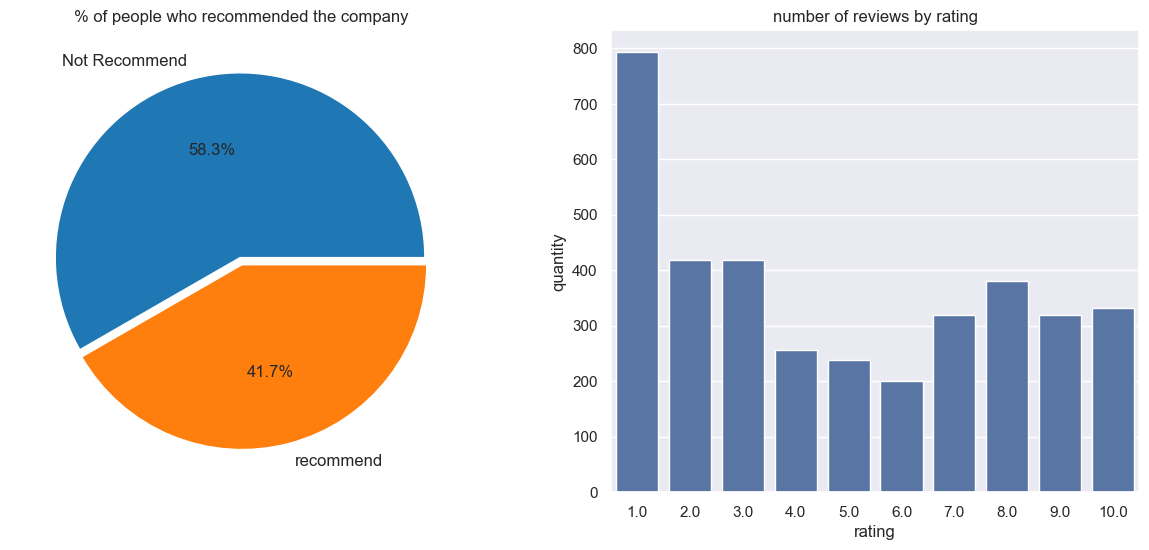

In [32]:
plt.figure(figsize=(15,6))



plt.subplot(121)
plt.title("% of people who recommended the company")
plt.pie(
    x=df["recommended"].value_counts(),
    labels=("Not Recommend", "recommend"),
    colors=['#1f77b4', '#ff7f0e'],
    autopct="%.1f%%",
    explode=(0.02,0.02),
    textprops={'fontsize': 12} 
)

plt.subplot(122)
sns.countplot(data=df, x="overall rating")
plt.title("number of reviews by rating")
plt.xlabel("rating")
plt.ylabel("quantity")

plt.show()

* More than half of the people do not recommend the company
* We have a lot of 1 ratings. Which pulls the ratings down a lot


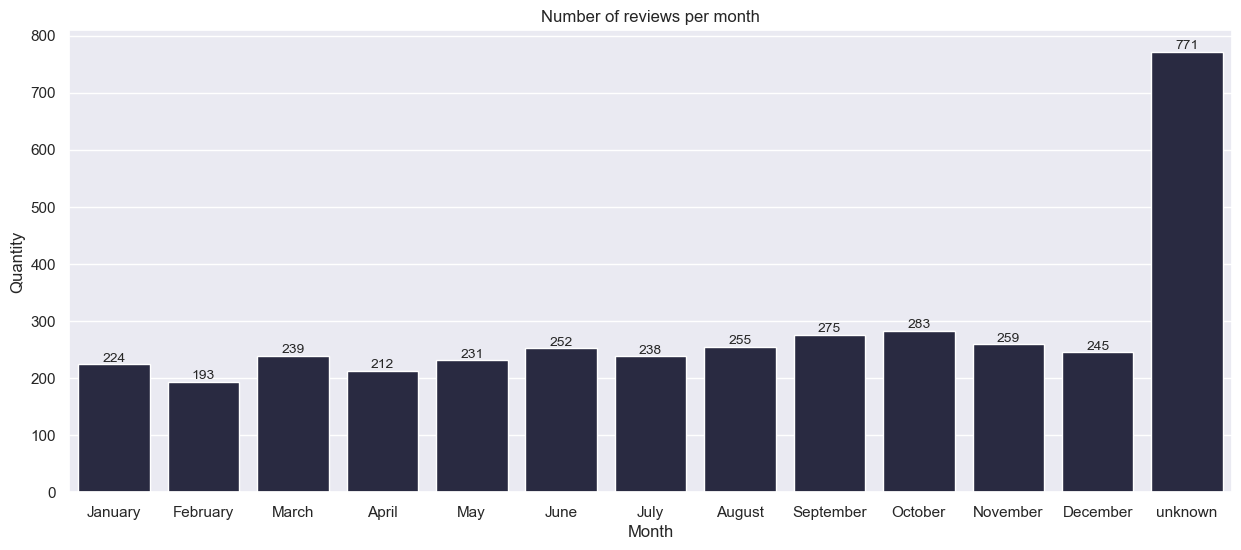

In [39]:
order = ["January", "February", "March", "April", "May", "June", 
         "July", "August", "September", "October", "November", "December", "unknown"]


plt.figure(figsize=(15,6))
ax =sns.countplot(data=df, x="month", order=order, color="#252745")
ax.bar_label(ax.containers[0], fontsize=10);
plt.title("Number of reviews per month")
plt.xlabel("Month")
plt.ylabel("Quantity")
plt.show()

* We can see that in general the number of reviews per month is very similar.


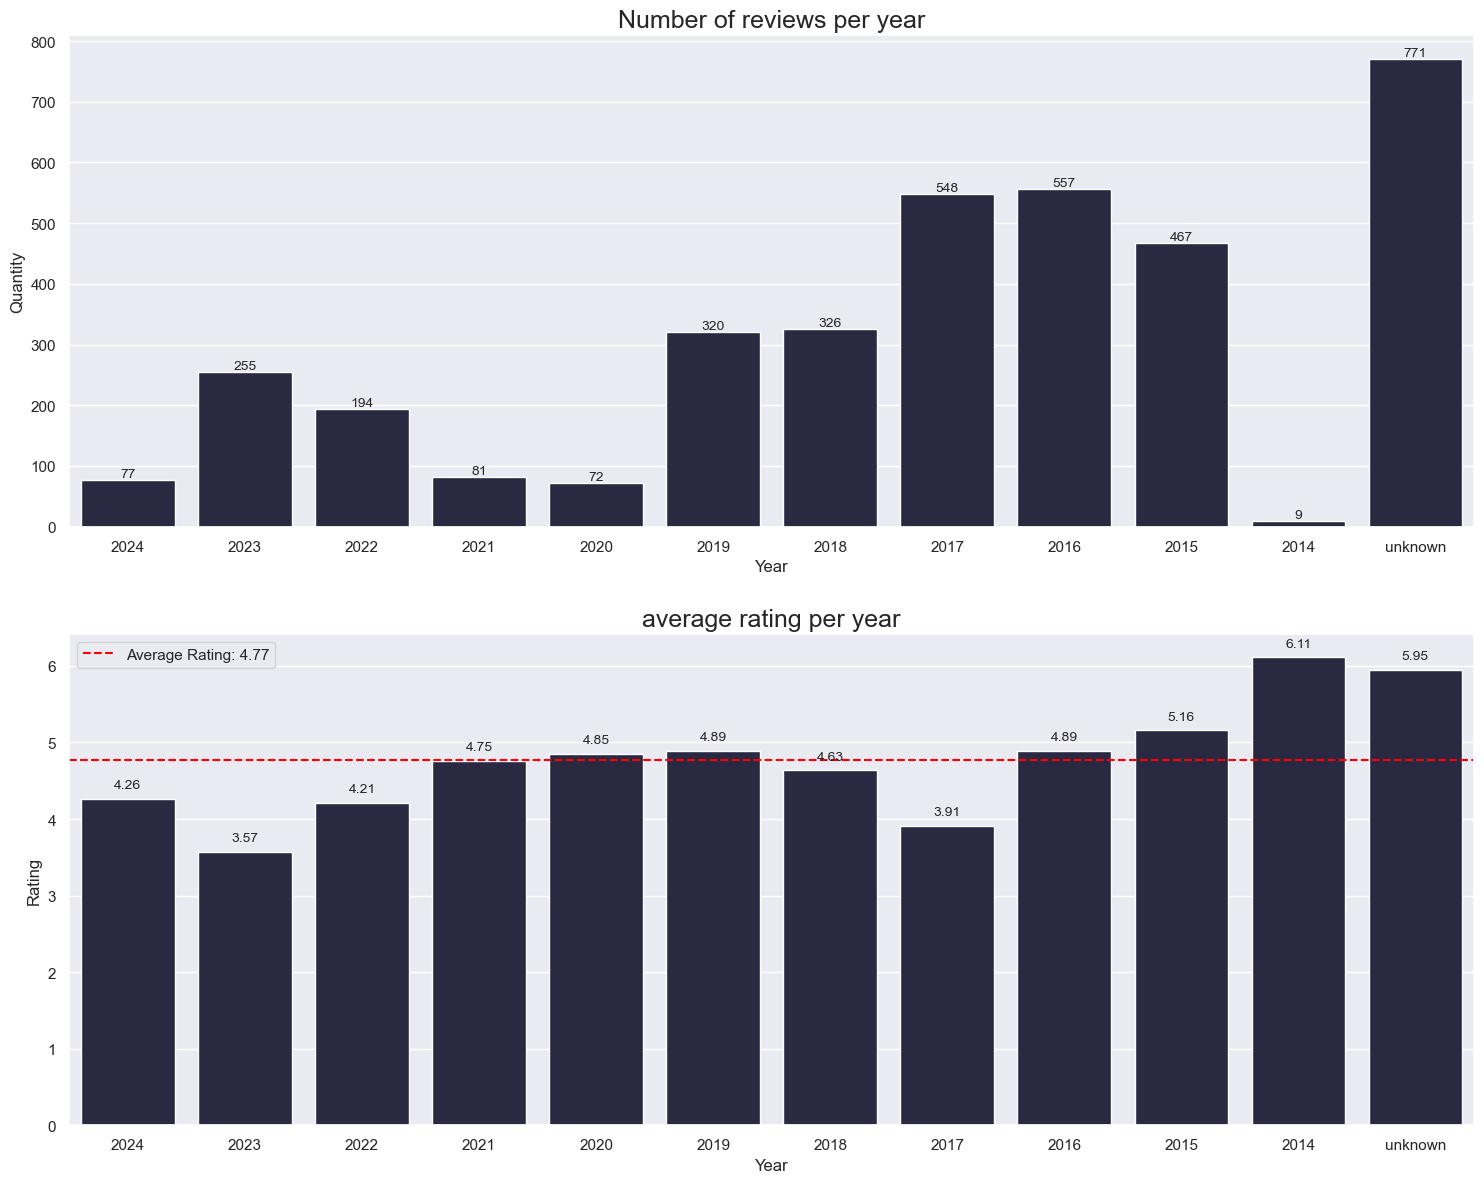

In [79]:
data_temp = pd.DataFrame()
data_temp = df.groupby(by="year")["overall rating"].mean().reset_index()
mean_rating = data_temp["overall rating"].mean()



order = ["2024", "2023", "2022", "2021", "2020", "2019", "2018", "2017", "2016", "2015", "2014", "unknown"]

plt.figure(figsize=(15,12))
plt.subplot(211)
ax =sns.countplot(data=df, x="year", order=order, color="#252745")
ax.bar_label(ax.containers[0], fontsize=10);
plt.title("Number of reviews per year", fontsize="18")
plt.xlabel("Year")
plt.ylabel("Quantity")

plt.subplot(212)
ax = sns.barplot(data=data_temp, x=data_temp.year, y=data_temp["overall rating"], order=order, color="#252745")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)
ax.axhline(mean_rating, c="red", ls="--", label= f'Average Rating: {mean_rating:.2f}')
ax.legend()
plt.title("average rating per year", fontsize="18")
plt.xlabel("Year")
plt.ylabel("Rating")


plt.tight_layout(h_pad = 2)
plt.show()

* Since 2015, the number of reviews has been decreasing, with its lowest number during the Covid-19 pandemic and gradually increasing from 2022 onwards.
* There are a large number of old reviews or reviews with unknown dates, with data that may no longer reflect the company's reality, it will be important to take this into consideration
* 2014 had the best average, but with only 9 records.
* 2023 had the worst score of all.
* the current year is the third worst in the ranking.

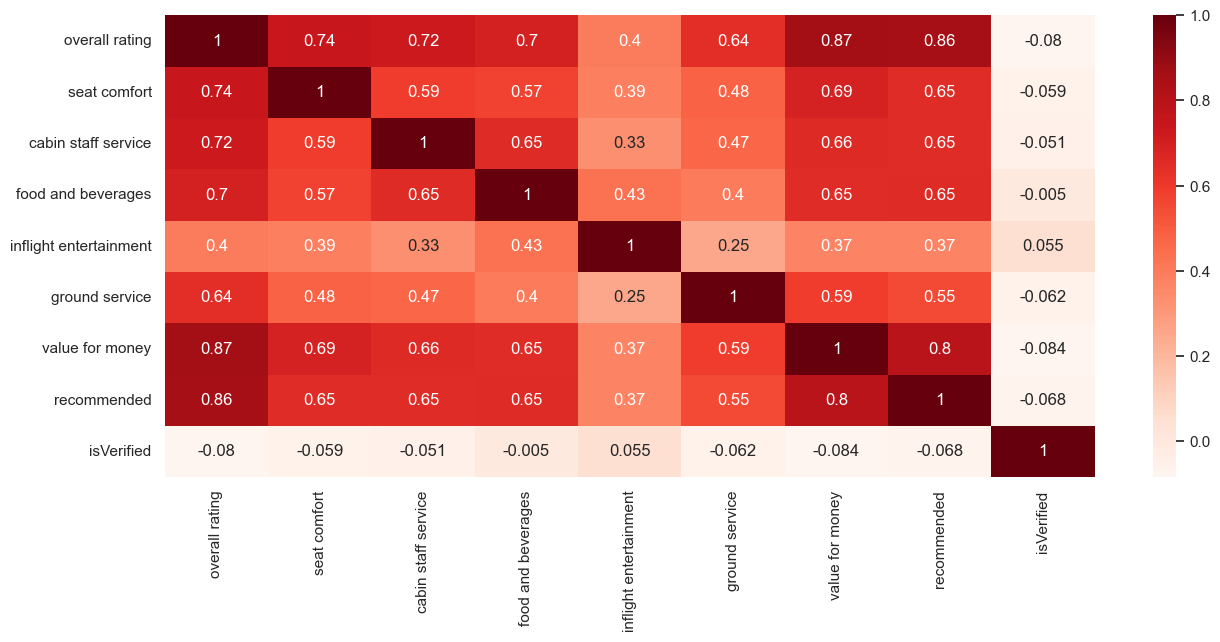

In [35]:
#mapa de correlação das variáveis numéricas
columns_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(15,6))
sns.heatmap(columns_numeric.corr(), annot=True, cmap="Reds")
plt.show()

* By observing the correlations with the "recommended" variable and also with the "overall rating" variable, we can define some customer priorities that have the most impact on the company's rating and recommendation.

1) value for money
2) food and beverages
3) seat confort
4) cabin staff service
5) ground service
6) inflight entertainment

* the most important is without a doubt the "value of money"
* "food and beverages", "seat confort", "cabin staff service" are also important
* "ground service" and "inflight entertainment" matter for the evaluation, but less than the others.

## Observing some categorical variables

In [36]:
# Loop
target = "recommended"
for i in df[["type of traveller","seat type","has via"]]:
    
    df_woe_iv = pd.crosstab(df[i], df[target], normalize='columns')
    df_woe_iv['woe'] = np.log(df_woe_iv[1] / df_woe_iv[0])
    df_woe_iv['woe'].replace({-np.inf: 0, np.inf: 0}, inplace=True)  #serve para ignorar as categorias que contenham 0 valores para verdadeiro ou falso
    df_woe_iv['iv'] = (df_woe_iv['woe'] * (df_woe_iv[1] - df_woe_iv[0])).sum()
    
    df_woe_iv["count_0"] = df.groupby(i)[target].apply(lambda x: (x == 0).sum())
    df_woe_iv["count_1"] = df.groupby(i)[target].apply(lambda x: (x == 1).sum())
    df_woe_iv["count_total"] = df_woe_iv["count_0"] + df_woe_iv["count_1"]
    df_woe_iv["% ocorrências"] = (df_woe_iv["count_1"] / (df_woe_iv["count_total"])) * 100


    print(df_woe_iv.sort_values(by="count_total", ascending=False).to_string(max_rows=None, max_cols=None),'\n------------------------------------------------------------\n\n')

recommended               0         1       woe        iv  count_0  count_1  count_total  % ocorrências
type of traveller                                                                                      
Couple Leisure     0.293843  0.242661 -0.191379  0.215325      630      372         1002      37.125749
Solo Leisure       0.221549  0.271363  0.202817  0.215325      475      416          891      46.689113
unknown            0.149254  0.288976  0.660695  0.215325      320      443          763      58.060288
Business           0.221549  0.097847 -0.817233  0.215325      475      150          625      24.000000
Family Leisure     0.113806  0.099152 -0.137841  0.215325      244      152          396      38.383838 
------------------------------------------------------------


recommended             0         1       woe        iv  count_0  count_1  count_total  % ocorrências
seat type                                                                                            
Econ

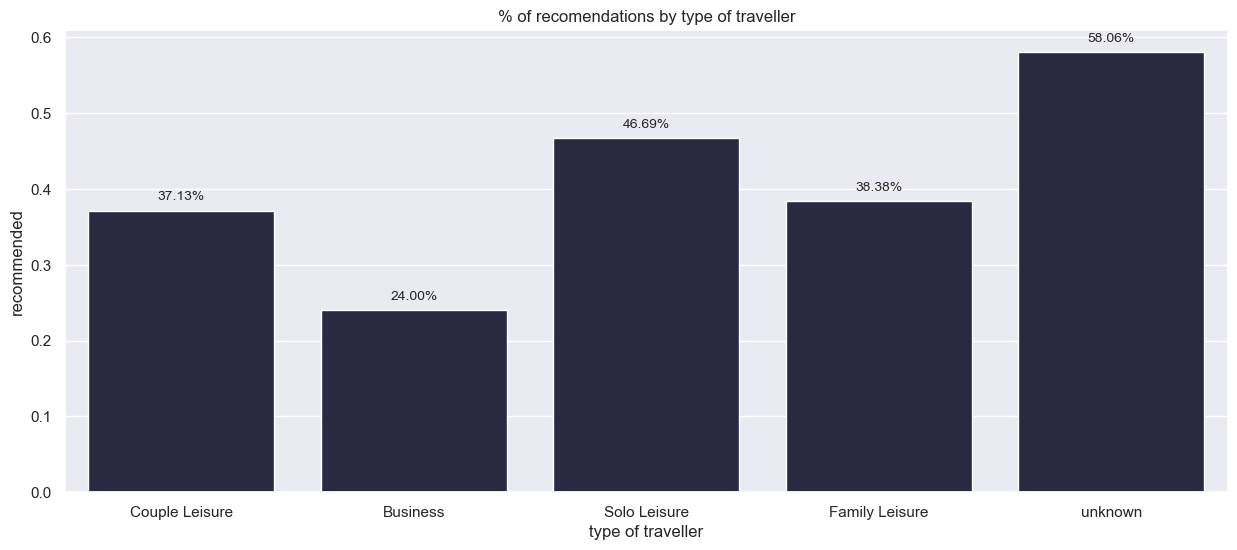

In [75]:
plt.figure(figsize=(15,6))
ax =sns.barplot(data=df, x="type of traveller", y="recommended", errorbar=None, color="#252745" )
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)
plt.title("% of recomendations by type of traveller")
plt.show()

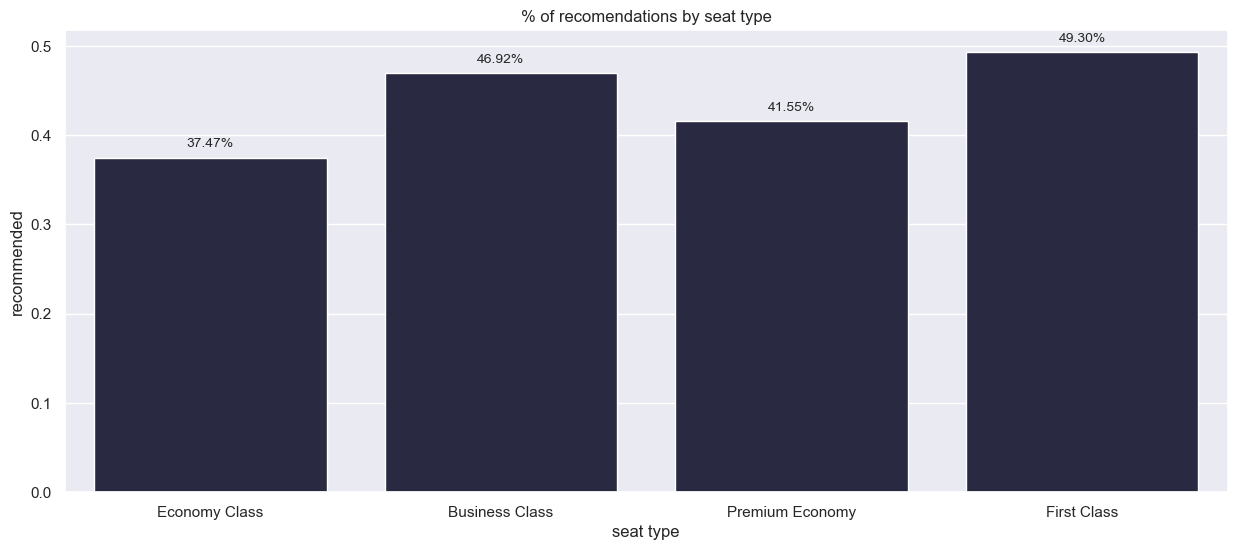

In [77]:
plt.figure(figsize=(15,6))
ax =sns.barplot(data=df, x="seat type", y="recommended", errorbar=None , color="#252745")
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)
plt.title("% of recomendations by seat type")
plt.show()

* People who travel for business usually rate the company worse.* People who travel in frist class usually evaluate the company better.
* The "type of traveler" column has an average predictive power, we can observe this through the IV (Information Value)

# 5- Conclusion 

## Resume
* Overall, around 59% of total reviews do not recommend the company
* The time of year does not have much impact on the number of reviews
* 2023 the company had the worst score (3.57) since the reviews began, in 2024 it currently has 4.26, still a low score and below the historical average, which is 4.77.
* In general, what most impacts the customer experience is, in order: value for money, food and beverages, seat confort, cabin staff service, ground service, inflight entertainment
* People who travel for business usually rate the company worse

## Insights
* Investing in value for money, food and beverages, seat comfort and cabin staff service can help improve reviews
* Investing in support for those traveling for business can improve the overall grades of this group
* Investing in service for people traveling in economy and premium economy classes can considerably increase positive reviews for theses groups
s